# Extracting Mech Test Data and reducing number of data points

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import pathlib
from pathlib import Path
import math
import scipy
from scipy.signal import savgol_filter, find_peaks
import os
import glob
from datetime import datetime


In [5]:
filename = 'ave_data.csv'

folder_path = r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\2. Modelling\FEBIO\data'

file_path = Path(folder_path) / filename

In [6]:
# extract data from csv file
column_names = ['Time (s)', 'Load (N)']

df_400 = pd.read_csv(file_path, skiprows=3, usecols=[4,5], header=None, names=column_names)



Reduced data saved to 'reduced_data_400.csv' and 'reduced_data_800.csv'.


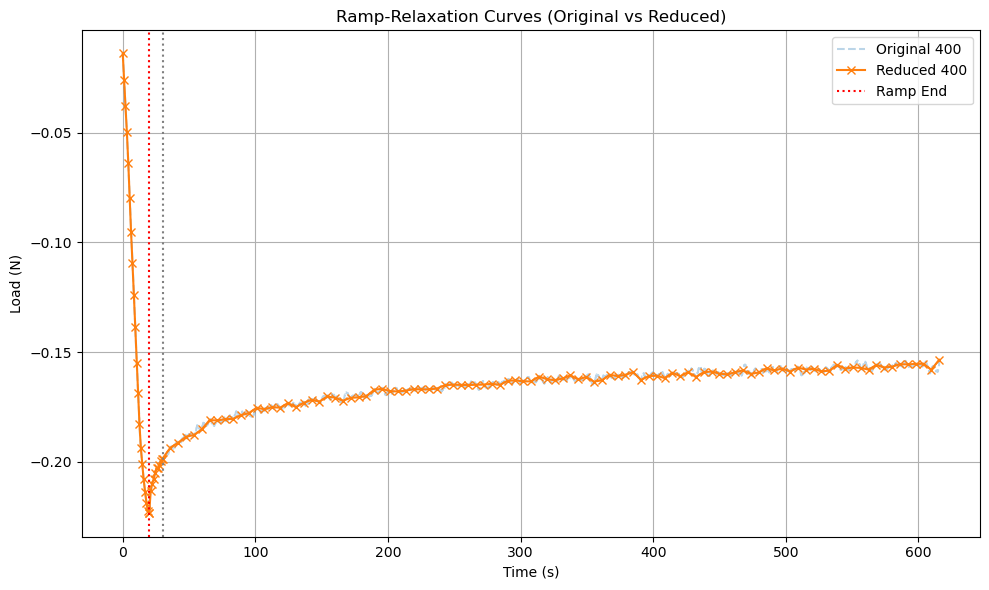

In [7]:
def reduce_segment(df, start_time, end_time, n_points):
    segment = df[(df['Time (s)'] >= start_time) & (df['Time (s)'] <= end_time)]
    if len(segment) <= n_points:
        return segment  # Nothing to reduce
    indices = np.linspace(0, len(segment) - 1, n_points).astype(int)
    return segment.iloc[indices]

# Reduce df_400
ramp_400 = reduce_segment(df_400, 0, 20, 20)
early_relax_400 = reduce_segment(df_400, 20, 30, 10)
late_relax_400 = reduce_segment(df_400, 30, 620, 100)
df_400_reduced = pd.concat([ramp_400, early_relax_400, late_relax_400], ignore_index=True)
df_400_reduced = df_400_reduced.sort_values('Time (s)').reset_index(drop=True)

# Save reduced data to CSV files
df_400_reduced.to_csv('reduced_data_400.csv', index=False)

print("Reduced data saved to 'reduced_data_400.csv' and 'reduced_data_800.csv'.")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_400['Time (s)'], df_400['Load (N)'], alpha=0.3, label='Original 400', linestyle='--')
plt.plot(df_400_reduced['Time (s)'], df_400_reduced['Load (N)'], label='Reduced 400', marker='x')

plt.axvline(20, color='red', linestyle=':', label='Ramp End')
plt.axvline(30, color='gray', linestyle=':')

plt.xlabel('Time (s)')
plt.ylabel('Load (N)')
plt.title('Ramp-Relaxation Curves (Original vs Reduced)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Parameters
folder_path = Path(r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\2. Modelling\FEBIO\data\raw')
column_names = ['Time (s)', 'Load (N)']
all_reduced = []

def reduce_segment(df, start_time, end_time, n_points):
    segment = df[(df['Time (s)'] >= start_time) & (df['Time (s)'] <= end_time)]
    if len(segment) <= n_points:
        return segment
    indices = np.linspace(0, len(segment) - 1, n_points).astype(int)
    return segment.iloc[indices]

# Loop through each CSV file
for file_path in folder_path.glob("*.csv"):
    try:
        df = pd.read_csv(file_path, skiprows=3, usecols=[4, 5], header=None,
                         names=column_names, encoding='ISO-8859-1')

        # Reduce data
        ramp = reduce_segment(df, 0, 20, 20)
        early_relax = reduce_segment(df, 20, 30, 10)
        late_relax = reduce_segment(df, 30, 620, 100)

        df_reduced = pd.concat([ramp, early_relax, late_relax], ignore_index=True)
        df_reduced = df_reduced.sort_values('Time (s)').reset_index(drop=True)

        # Rename columns to include filename (excluding extension)
        base_name = file_path.stem
        df_reduced.columns = [f'Time ({base_name})', f'Load ({base_name})']

        all_reduced.append(df_reduced.reset_index(drop=True))

    except Exception as e:
        print(f"Error processing {file_path.name}: {e}")

# Combine all reduced datasets side-by-side
if all_reduced:
    final_df = pd.concat(all_reduced, axis=1)
    output_path = folder_path / 'combined_reduced_data.csv'
    final_df.to_csv(output_path, index=False)
    print(f"Combined side-by-side data saved to {output_path}")
else:
    print("No CSV files were successfully processed.")


Combined side-by-side data saved to C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\2. Modelling\FEBIO\data\raw\combined_reduced_data.csv
